<a href="https://www.kaggle.com/code/yaramahrous/tipping-eda?scriptVersionId=192694806" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [3]:
df = pd.read_csv('tips.csv')

# Exploring the data

In [4]:
df.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

In [5]:
df.describe()

total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000

The total_bill ranging from 3.07 to 50.81 with average = 19.785943 and a standard deviation = 8.902412.


The tip ranging from 1.00 to 10.00 with average = 2.998279 and a standard deviation = 1.383638.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 244 entries, 0 to 243

Data columns (total 7 columns):

 #   Column      Non-Null Count  Dtype  

---  ------      --------------  -----  

 0   total_bill  244 non-null    float64

 1   tip         244 non-null    float64

 2   sex         244 non-null    object 

 3   smoker      244 non-null    object 

 4   day         244 non-null    object 

 5   time        244 non-null    object 

 6   size        244 non-null    int64  

dtypes: float64(2), int64(1), object(4)

memory usage: 13.5+ KB


In [7]:
df.shape

(244, 7)

In [8]:
df.size

1708

In [9]:
df.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

There are no missing values in the data 

In [10]:
df.describe(include=['object'])

sex smoker  day    time
count    244    244  244     244
unique     2      2    4       2
top     Male     No  Sat  Dinner
freq     157    151   87     176

Number of male customers > Number of female customers

Number of non-smoker customers > Number of smoker customers

In [11]:
df['day'].unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

The data is collected only on 4 days which are: Saturday, Sunday, Thursday, Friday  

The number data collected on Saturday > number data collected on any other day


In [12]:
df['time'].unique()

array(['Dinner', 'Lunch'], dtype=object)

The data is collected only on 2 times in the prev days which are: Lunch, Dinner

The number data collected during dinner > number data collected during lunch


# Visualizing the data

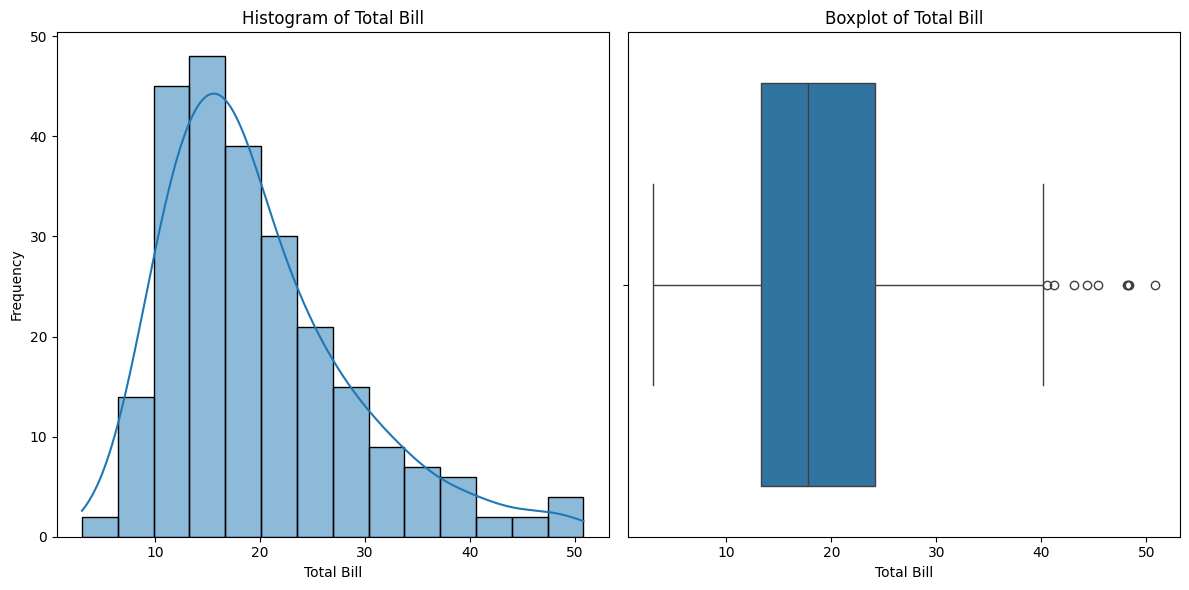

In [13]:
fig, ax = plt.subplots(1, 2 , figsize=(12, 6))

# Histogram with KDE
sns.histplot(df['total_bill'], kde=True, ax=ax[0])
ax[0].set_title('Histogram of Total Bill')
ax[0].set_xlabel('Total Bill')
ax[0].set_ylabel('Frequency')

# Boxplot
sns.boxplot(x=df['total_bill'], ax=ax[1])
ax[1].set_title('Boxplot of Total Bill')
ax[1].set_xlabel('Total Bill')

# Show the plot
plt.tight_layout()

In [14]:
df['total_bill'].skew()

1.1332130376158205

The total_bill column has a skewness of 1.133, indicating a slightly right-skewed distribution with more lower values and a longer tail on the higher end.

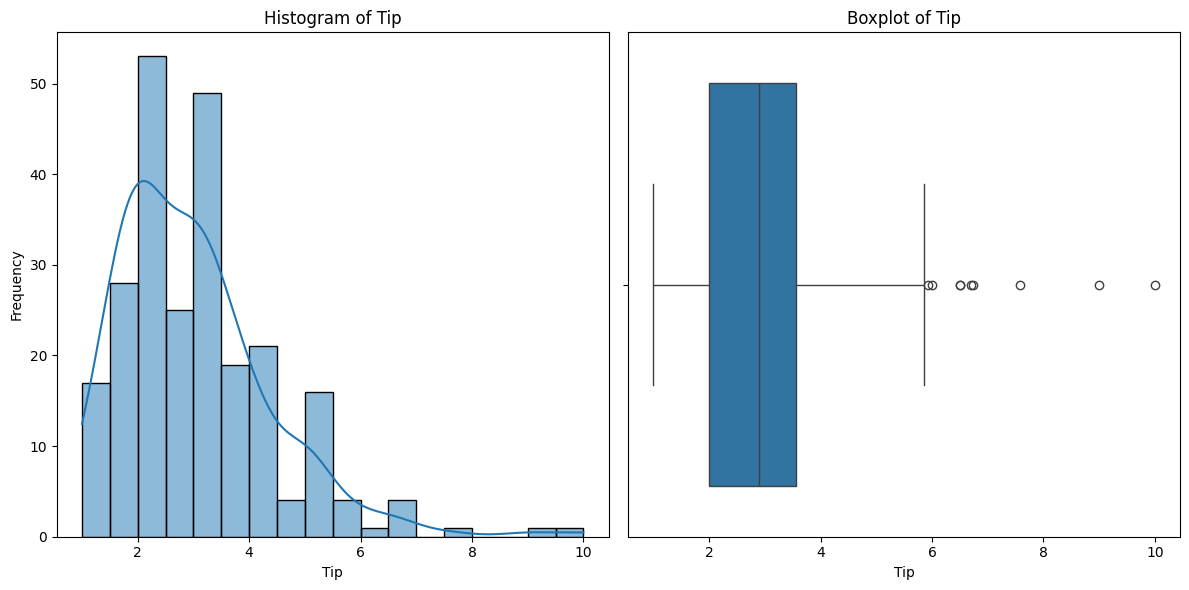

In [15]:
fig, ax = plt.subplots(1, 2 , figsize=(12, 6))

# Histogram with KDE
sns.histplot(df['tip'], kde=True, ax=ax[0])
ax[0].set_title('Histogram of Tip')
ax[0].set_xlabel('Tip')
ax[0].set_ylabel('Frequency')

# Boxplot
sns.boxplot(x=df['tip'], ax=ax[1])
ax[1].set_title('Boxplot of Tip')
ax[1].set_xlabel('Tip')

# Show the plot
plt.tight_layout()

In [16]:
df['tip'].skew()

1.4654510370979401

The tip column has a skewness of 1.465, indicating a right-skewed distribution with more lower values and a longer tail on the higher end.

Text(0, 0.5, 'Frequency')

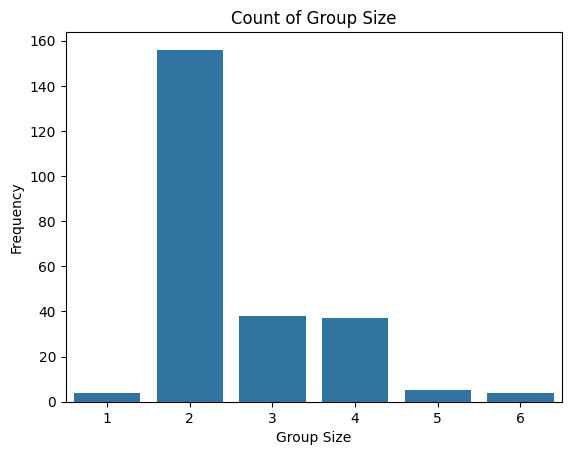

In [17]:
sns.countplot(data=df, x='size')
plt.title('Count of Group Size')
plt.xlabel('Group Size')
plt.ylabel('Frequency')

In [18]:
df['size'].skew()

1.4478815386834785

The size column has a skewness of 1.448, indicating a right-skewed distribution with more lower values and a longer tail on the higher end.

Text(0, 0.5, 'Frequency')

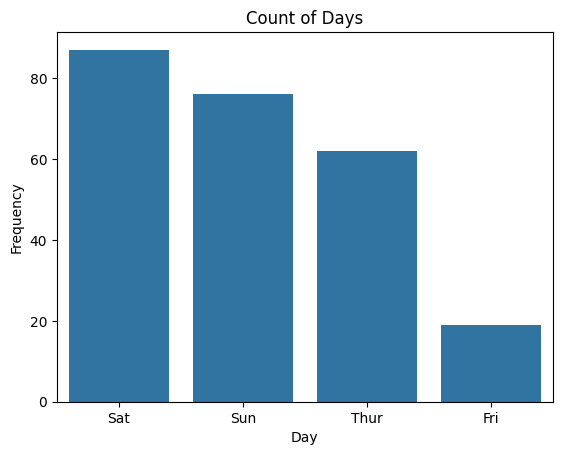

In [19]:
sns.countplot(data=df, x='day', order=['Sat', 'Sun', 'Thur', 'Fri'])
plt.title('Count of Days')
plt.xlabel('Day')
plt.ylabel('Frequency')


Text(0, 0.5, 'Frequency')

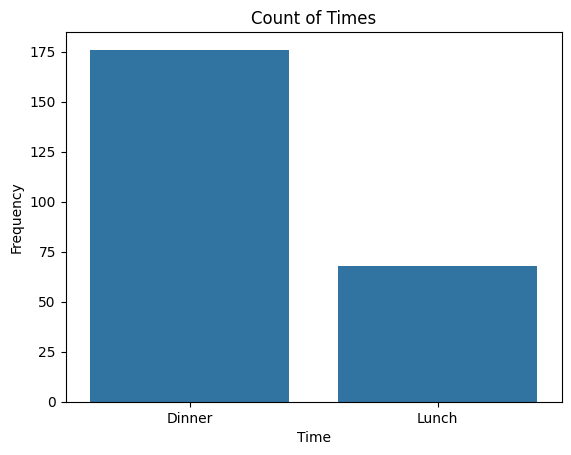

In [20]:
sns.countplot(data=df, x='time')
plt.title('Count of Times')
plt.xlabel('Time')
plt.ylabel('Frequency')

<Axes: xlabel='sex', ylabel='count'>

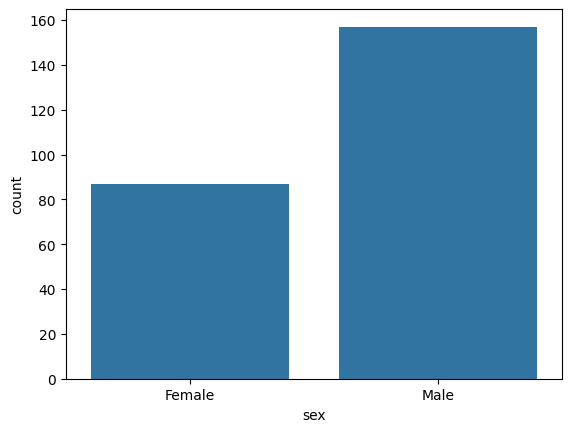

In [21]:
sns.countplot(data=df, x='sex')

Text(0, 0.5, 'Frequency')

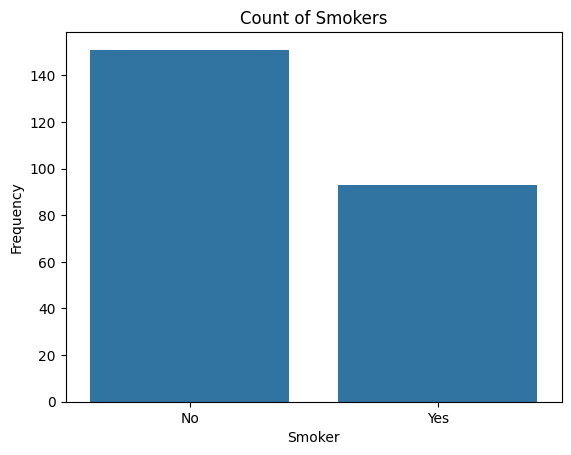

In [22]:
sns.countplot(data=df, x='smoker')
plt.title('Count of Smokers')
plt.xlabel('Smoker')
plt.ylabel('Frequency')

In [23]:
#plot helper function

def func(pct, allvalues):
    absolute = int(pct / 100. * sum(allvalues))
    return f'{absolute}\n({pct:.1f}%)'


Text(0, 0.5, 'Frequency')

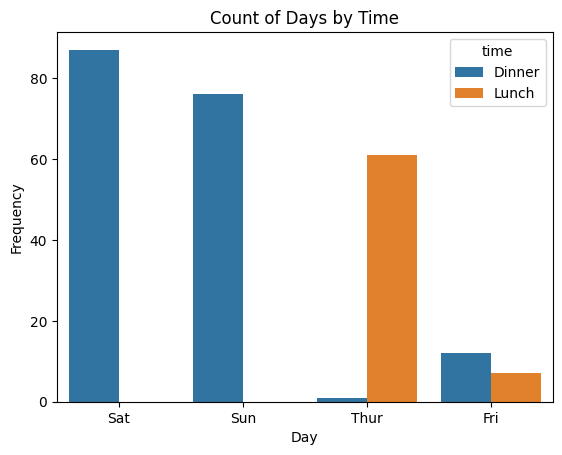

In [24]:
sns.countplot(data=df, x='day', hue = 'time' , order=['Sat', 'Sun', 'Thur', 'Fri'])
plt.title('Count of Days by Time')
plt.xlabel('Day')
plt.ylabel('Frequency')

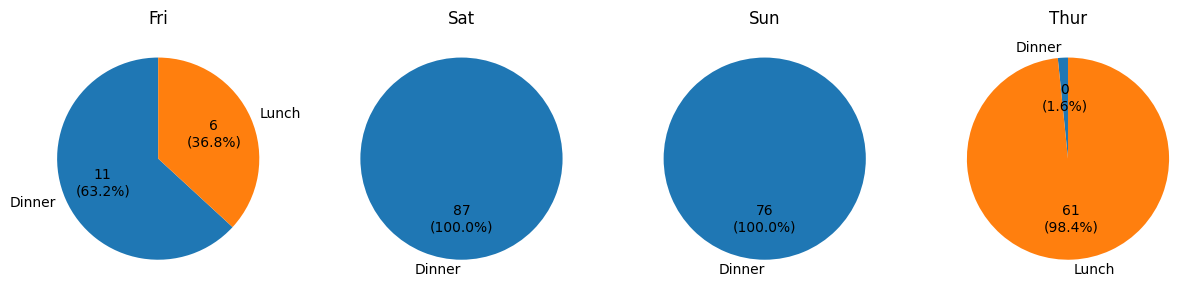

In [25]:
agg_data = df.groupby(['day', 'time']).size().reset_index(name='count')
days = agg_data['day'].unique()
fig, axes = plt.subplots(1,len(days) , figsize=(15, len(days)))
axes = axes.flatten()


for i, day in enumerate(days):
    day_data = agg_data[agg_data['day'] == day]
    wedges, texts, autotexts = axes[i].pie(
        day_data['count'],
        labels=day_data['time'],
        autopct=lambda pct: func(pct, day_data['count']),
        startangle=90,
    )
    axes[i].set_title(f'{day}')

### From the previous plots, we can see that :
#### The count of the most dinner is on Saturday
#### The count of the most lunch is on Thursday
#### The precentage of dinner > The precentage of lunch on all days

Text(0, 0.5, 'Frequency')

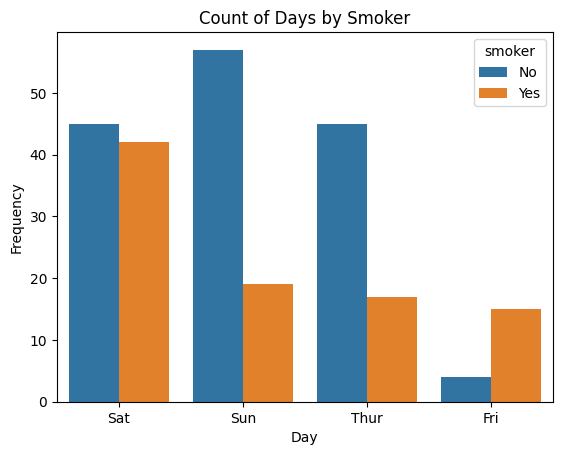

In [26]:
sns.countplot(data=df, x='day', hue = 'smoker' , order=['Sat', 'Sun', 'Thur', 'Fri'])
plt.title('Count of Days by Smoker')
plt.xlabel('Day')
plt.ylabel('Frequency')


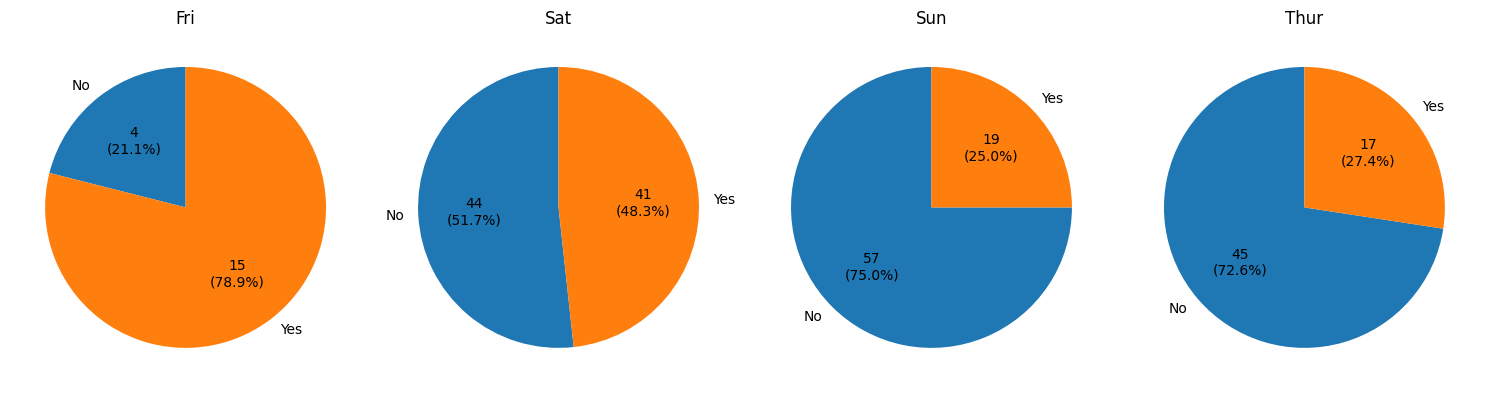

In [52]:
agg_data = df.groupby(['day', 'smoker']).size().reset_index(name='count')
days = agg_data['day'].unique()

fig, axes = plt.subplots(1,len(days) , figsize=(15, len(days)))
axes = axes.flatten()

for i, day in enumerate(days):
    day_data = agg_data[agg_data['day'] == day]
    axes[i].pie(
        day_data['count'],
        labels=day_data['smoker'],
        startangle=90,
        autopct=lambda pct: func(pct, day_data['count']))
    axes[i].set_title(day)

plt.tight_layout()


### From the previous plots, we can see that :
#### The count of the most non-smokers is on Sunday
#### The count of the most smokers is on Saturday
#### The precentage of smokers > The precentage of non-smokers on Friday only

Text(0, 0.5, 'Frequency')

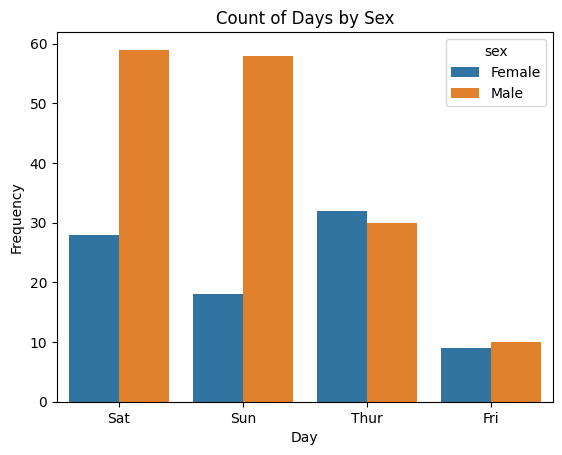

In [28]:
sns.countplot(data=df, x='day', hue = 'sex' , order=['Sat', 'Sun', 'Thur', 'Fri'])
plt.title('Count of Days by Sex')   
plt.xlabel('Day')
plt.ylabel('Frequency')

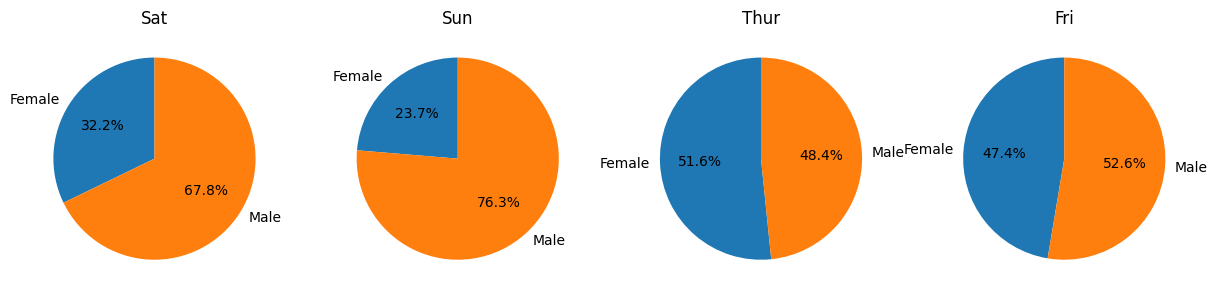

In [29]:
agg_data = df.groupby(['day', 'sex']).size().reset_index(name='count')
days = agg_data['day'].unique()

fig, axes = plt.subplots(1,len(days) , figsize=(15, len(days)))
axes = axes.flatten()


# Step 2: Create pie charts for each day
for i, day in enumerate(sorted(days, key=lambda x: ['Sat', 'Sun', 'Thur', 'Fri'].index(x))):
    day_data = agg_data[agg_data['day'] == day]
    wedges, texts, autotexts = axes[i].pie(day_data['count'], labels=day_data['sex'], autopct='%1.1f%%', startangle=90)
    axes[i].set_title(day)



### From the previous plots, we can see that :
#### The count of the most males is on Saturday
#### The count of the most females is on Thursday
#### The precentage of females > The precentage of males on Thursday only

Text(0, 0.5, 'Frequency')

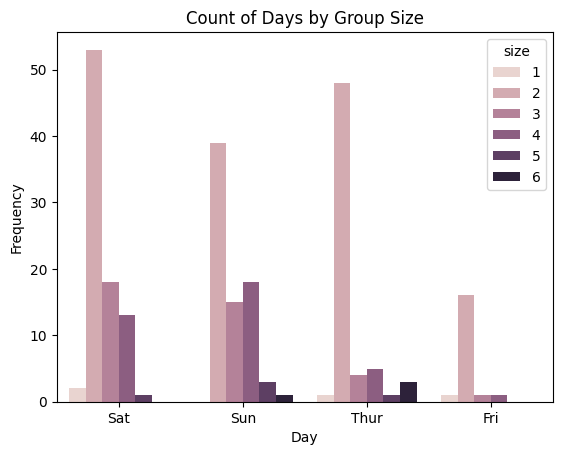

In [30]:
sns.countplot(data=df, x='day', hue = 'size' , order=['Sat', 'Sun', 'Thur', 'Fri'])
plt.title('Count of Days by Group Size')
plt.xlabel('Day')
plt.ylabel('Frequency')

The group size dominant value is 2 in all days

Text(0, 0.5, 'Frequency')

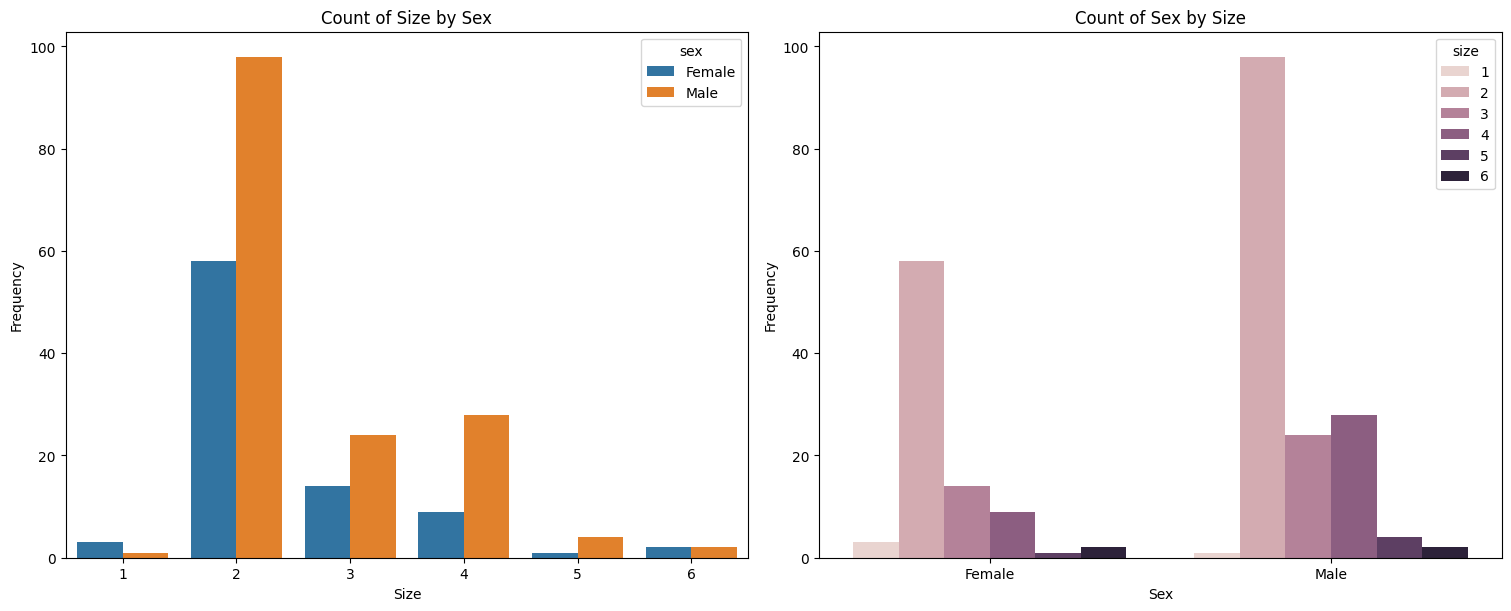

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6), constrained_layout=True)

sns.countplot(data=df, x='size', hue='sex', ax=axes[0])
axes[0].set_title('Count of Size by Sex')
axes[0].set_xlabel('Size')
axes[0].set_ylabel('Frequency')

# Plot countplot for 'sex' with 'size' as hue
sns.countplot(data=df, x='sex', hue='size', ax=axes[1])
axes[1].set_title('Count of Sex by Size')
axes[1].set_xlabel('Sex')
axes[1].set_ylabel('Frequency')



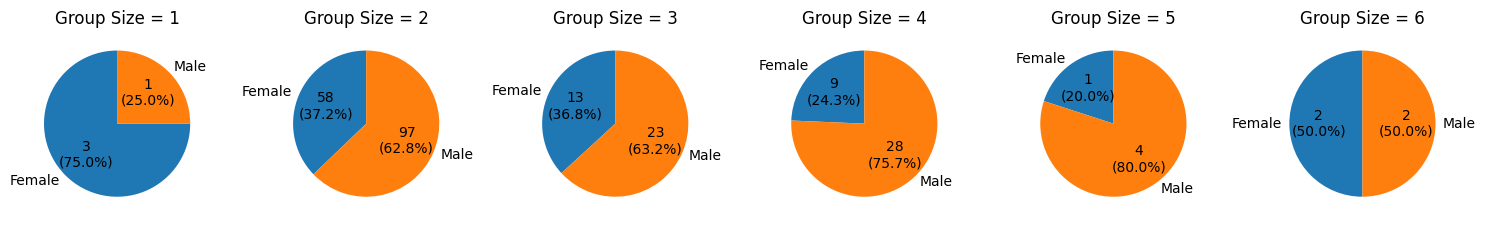

In [32]:
agg_data = df.groupby(['size', 'sex']).size().reset_index(name='count')
sizes = sorted(agg_data['size'].unique())

fig, axes = plt.subplots(1,len(sizes) , figsize=(15, len(sizes)))
axes = axes.flatten()


for i, size in enumerate(sizes):
    size_data = agg_data[agg_data['size'] == size]
    wedges, texts, autotexts = axes[i].pie(
        size_data['count'],
        labels=size_data['sex'],
        autopct=lambda pct: func(pct, size_data['count']),
        startangle=90,
    )
    axes[i].set_title(f'Group Size = {size}')

plt.tight_layout()

### From the previous plots, we can see that :
#### The count of the most males is within group size = 2
#### The count of the most females is also within group size = 2
#### The precentage of males = The precentage of females within group size = 6
#### The precentage of males < The precentage of females within group size = 1
#### The precentage of males > The precentage of females within any other group size

Text(0, 0.5, 'Frequency')

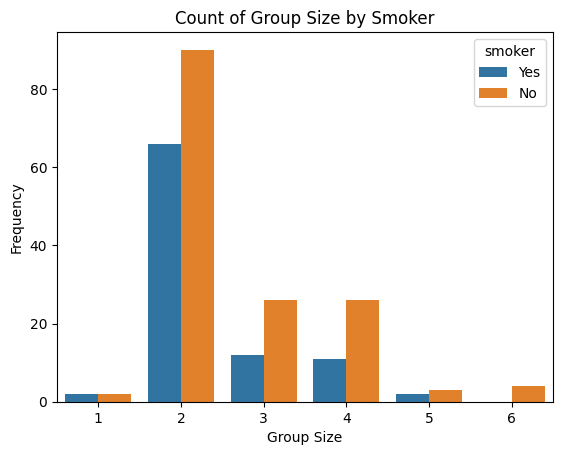

In [33]:
sns.countplot(data=df, x='size', hue = 'smoker')
plt.title('Count of Group Size by Smoker')
plt.xlabel('Group Size')
plt.ylabel('Frequency')

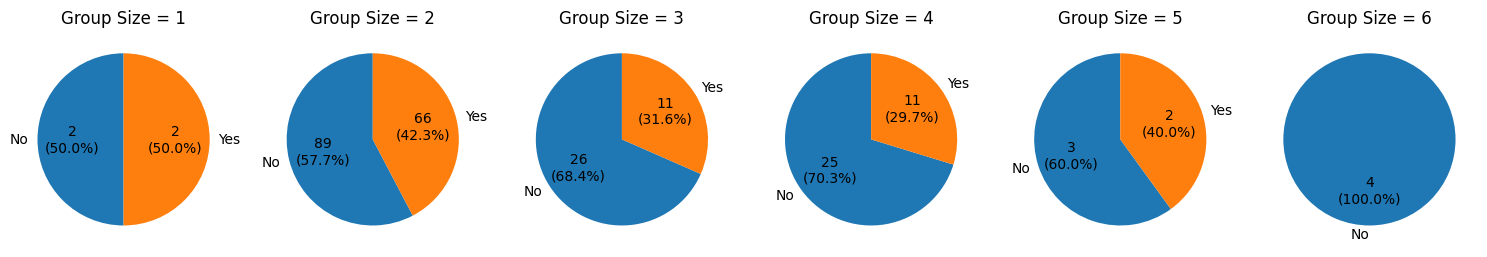

In [34]:
agg_data = df.groupby(['size', 'smoker']).size().reset_index(name='count')
sizes = sorted(agg_data['size'].unique())

fig, axes = plt.subplots(1,len(sizes) , figsize=(15, len(sizes)))
axes = axes.flatten()


for i, size in enumerate(sizes):
    size_data = agg_data[agg_data['size'] == size]
    wedges, texts, autotexts = axes[i].pie(
        size_data['count'],
        labels=size_data['smoker'],
        autopct=lambda pct: func(pct, size_data['count']),
        startangle=90,
    )
    axes[i].set_title(f'Group Size = {size}')

plt.tight_layout()

### From the previous plots, we can see that :
#### The count of the most smokers is within group size = 2
#### The count of the most non-smokers is also within group size = 2
#### The precentage of smokers = The precentage of non-smokers within group size = 1
#### The precentage of non-smokers > The precentage of smokers within any other group size

Text(0, 0.5, 'Frequency')

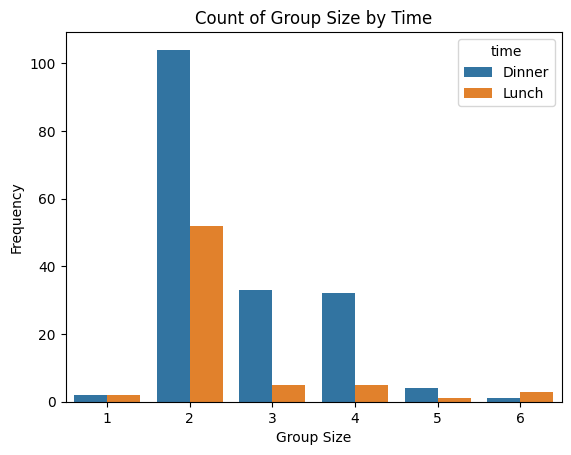

In [35]:
sns.countplot(data=df, x='size', hue = 'time')
plt.title('Count of Group Size by Time')
plt.xlabel('Group Size')
plt.ylabel('Frequency')

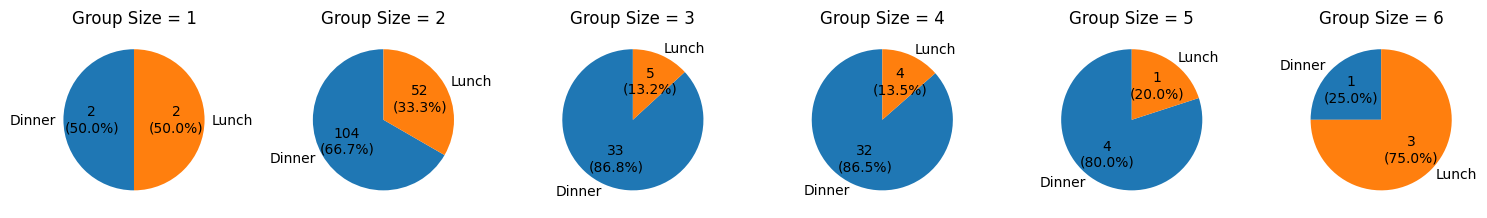

In [36]:
agg_data = df.groupby(['size', 'time']).size().reset_index(name='count')
sizes = sorted(agg_data['size'].unique())

fig, axes = plt.subplots(1,len(sizes), figsize=(15, len(sizes)))
axes = axes.flatten()


for i, size in enumerate(sizes):
    size_data = agg_data[agg_data['size'] == size]
    wedges, texts, autotexts = axes[i].pie(
        size_data['count'],
        labels=size_data['time'],
        autopct=lambda pct: func(pct, size_data['count']),
        startangle=90,
    )
    axes[i].set_title(f'Group Size = {size}')

plt.tight_layout()

### From the previous plots, we can see that :
#### The count of the most dinner is within group size = 2
#### The count of the most lunch is also within group size = 2
#### The precentage of dinner = The precentage of lunch within group size = 1
#### The precentage of dinner < The precentage of lunch within group size = 6
#### The precentage of dinner > The precentage of lunch within any other group size

Text(0, 0.5, 'Frequency')

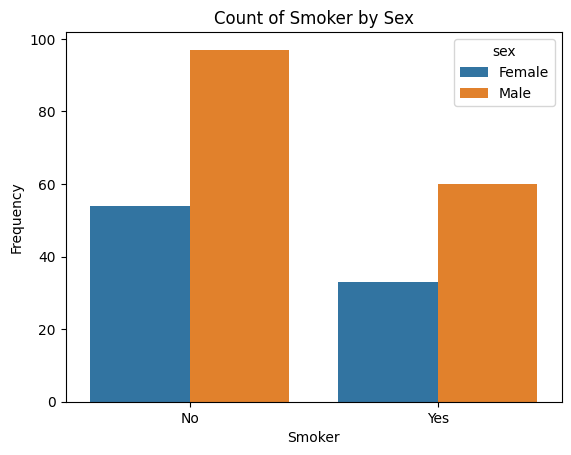

In [37]:
sns.countplot(data=df, x='smoker', hue = 'sex')
plt.title('Count of Smoker by Sex')
plt.xlabel('Smoker')
plt.ylabel('Frequency')

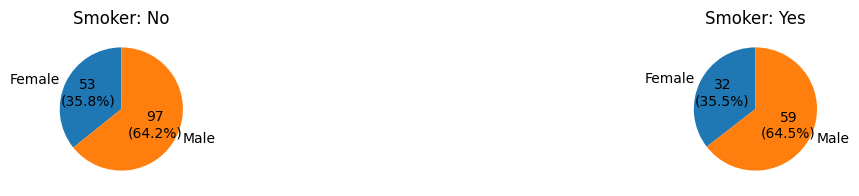

In [38]:
agg_data = df.groupby(['smoker', 'sex']).size().reset_index(name='count')

# Get unique values for 'smoker'
smokers = sorted(df['smoker'].unique())

# Set up the figure with subplots
fig, axes = plt.subplots(1, len(smokers), figsize=(15, len(smokers)))
for i, smoker in enumerate(smokers):
    smoker_data = agg_data[agg_data['smoker'] == smoker]
    wedges, texts, autotexts = axes[i].pie(
        smoker_data['count'],
        labels=smoker_data['sex'],
        autopct=lambda pct: func(pct, smoker_data['count']),
        startangle=90,
    )
    axes[i].set_title(f'Smoker: {smoker}')


### From the previous plots, we can see that :
#### The count of the most males is non-smoker
#### The count of the most females is non-smoker
#### The precentage of males > The precentage of females in smoker and non-smoker

Text(0, 0.5, 'Frequency')

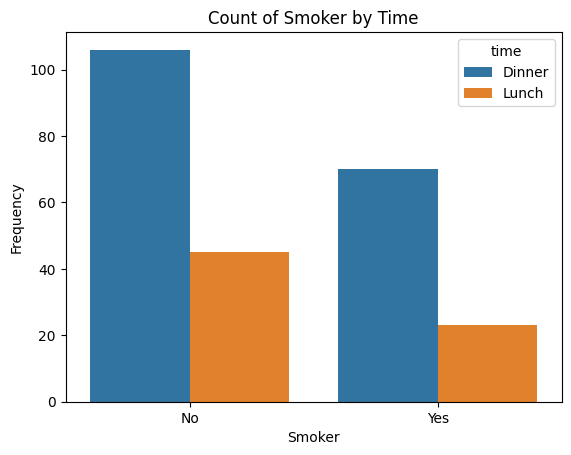

In [39]:
sns.countplot(data=df, x='smoker', hue = 'time')
plt.title('Count of Smoker by Time')
plt.xlabel('Smoker')
plt.ylabel('Frequency')

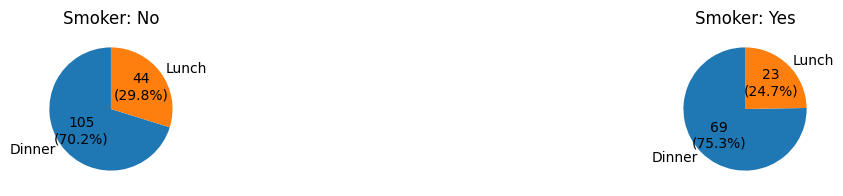

In [40]:
agg_data = df.groupby(['smoker', 'time']).size().reset_index(name='count')

# Get unique values for 'smoker'
smokers = sorted(df['smoker'].unique())

# Set up the figure with subplots
fig, axes = plt.subplots(1, len(smokers), figsize=(15, len(smokers)))
for i, smoker in enumerate(smokers):
    smoker_data = agg_data[agg_data['smoker'] == smoker]
    wedges, texts, autotexts = axes[i].pie(
        smoker_data['count'],
        labels=smoker_data['time'],
        autopct=lambda pct: func(pct, smoker_data['count']),
        startangle=90,
    )
    axes[i].set_title(f'Smoker: {smoker}')


### From the previous plots, we can see that :
#### The count of the most dinner is non-smoker
#### The count of the most lunch is non-smoker
#### The precentage of dinner > The precentage of lunch in smoker and non-smoker

## Correlations

<Axes: >

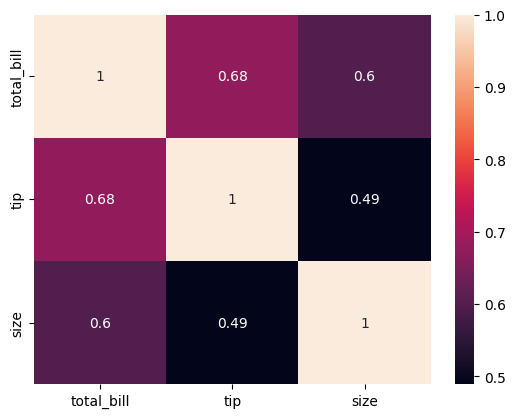

In [41]:
i = df.select_dtypes(include=['number']).columns.tolist()
sns.heatmap(df[i].corr(), annot=True)

Text(0, 0.5, 'Tip')

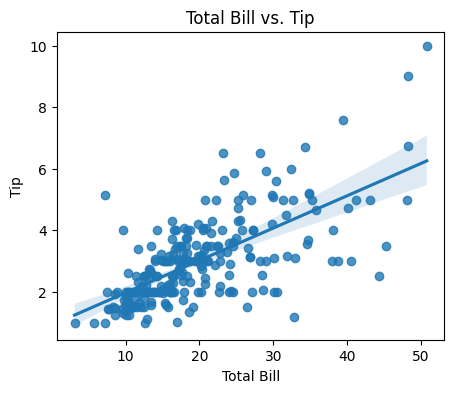

In [42]:
plt.figure(figsize=(5, 4))
sns.regplot(
    x='total_bill',
    y='tip',
    data=df,
)

plt.title('Total Bill vs. Tip')
plt.xlabel('Total Bill')
plt.ylabel('Tip')


We can see that there is positive correlation between the total bill and tip columns

Text(0, 0.5, 'Group Size')

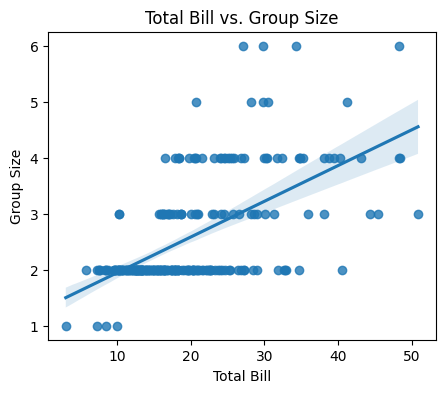

In [43]:
plt.figure(figsize=(5, 4))
sns.regplot(
    x='total_bill',
    y='size',
    data=df,
)

plt.title('Total Bill vs. Group Size')
plt.xlabel('Total Bill')
plt.ylabel('Group Size')


We can see that there is positive correlation between the total bill and size columns

# Dataset Summary

| Column Name    | Description                                                           | Value Options                           |
|-------------|-----------------------------------------------------------------------|-----------------------------------------|
| total_bill  | Total bill amount                            | Continuous                              |
| tip         | Tip amount                                                  | Continuous                              |
| sex         | Gender of the person paying the bill                                  | "Male", "Female"                        |
| smoker      | Indicates if the person paying the bill is a smoker                                   | "Yes", "No"                             |
| day         | Day of the week when the meal was served                              | "Sun", "Sat", "Thur", "Fri"             |
| time        | Time of the meal                                 | "Lunch", "Dinner"                       |
| size        | Number of people in the group                                         | Integer                                 |